# **openCV Note**

## ① 图像基本操作

### **1.数据读取-图像**

· cv2.IMREAD_COLOR: 彩色图像，属性值  
· cv2.IMREAD_GRAYSCALE: 灰度图像，属性值

In [23]:
import cv2 #openCV默认读取格式为BGR
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

img = cv2.imread(r'..\assets\img\ZhuKezhen.jpg')

In [24]:
#输出三层[h,w,c]
print(img)

[[[180 184 195]
  [191 193 204]
  [196 196 208]
  ...
  [101 130 161]
  [ 99 128 159]
  [ 97 126 157]]

 [[181 185 196]
  [190 192 203]
  [194 194 206]
  ...
  [102 131 162]
  [101 130 161]
  [101 130 161]]

 [[187 188 202]
  [189 190 204]
  [190 190 204]
  ...
  [ 95 127 156]
  [ 94 126 155]
  [ 94 126 155]]

 ...

 [[ 42  67  77]
  [ 40  65  75]
  [ 37  62  72]
  ...
  [ 95  85 121]
  [ 88  78 114]
  [ 92  82 118]]

 [[ 40  65  75]
  [ 37  62  72]
  [ 35  60  70]
  ...
  [ 72  65  98]
  [ 63  56  91]
  [ 71  64  97]]

 [[ 39  65  77]
  [ 37  61  73]
  [ 33  57  69]
  ...
  [ 80  80 110]
  [ 89  88 120]
  [ 90  90 120]]]


In [ ]:
#图像显示，可创建多个窗口
cv2.imshow('ZhuKezhen', img)
#等待时间，毫秒级，0表示任意键终止
#可设置毫秒时间终止
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
def cv2_show(name, img):
    cv2.imshow(name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [15]:
#获取图像shape：h,w,c
img.shape

(1969, 1476, 3)

In [31]:
#灰度图像通道
img_gray = cv2.imread(r'..\assets\img\ZhuKezhen.jpg', cv2.IMREAD_GRAYSCALE)
img_gray

array([[187, 196, 200, ..., 136, 134, 132],
       [188, 195, 198, ..., 137, 136, 136],
       [192, 194, 194, ..., 132, 131, 131],
       ...,
       [ 67,  65,  62, ...,  97,  90,  94],
       [ 65,  62,  60, ...,  76,  67,  75],
       [ 66,  62,  58, ...,  89,  98,  99]], dtype=uint8)

In [32]:
#输出灰度图
cv2_show('ZhuKezhen Gray', img_gray)
#可以看到shape只有一层
img.shape

(1969, 1476, 3)

In [ ]:
#图像保存
cv2.imwrite(r'..\assets\img\ZhuKezhen_gray.jpg', img_gray)

True

### **2.数据读取-视频**

· cv2.VideoCapture可以捕获摄像头，用数字来控制不同设备，例如0，1  
· 如果读取视频文件，直接指定路径

In [ ]:
vc = cv2.VideoCapture(r'..\assets\videos\Test.mp4')

In [10]:
#检查视频能否正确打开
#返回两个值，第一个是布尔值，第二个是视频帧
if vc.isOpened():
    open, frame = vc.read()
else:
    open = False

In [18]:
while open:
    ret, frame = vc.read()
    if frame is None:
        break
    if ret == True:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        cv2.imshow('Result', gray)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
vc.release()
cv2.destroyAllWindows()

### **3.截取部分图像数据**

In [27]:
img = cv2.imread(r'..\assets\img\ZhuKezhen.jpg')
Zhu = img[0:1000, 0:1000]  # 截取部分图像数据
cv2_show('ZhuKezhen Crop', Zhu)

### **4.颜色通道提取**

In [29]:
B,G,R = cv2.split(img)  # 分离BGR通道
B,G,R

(array([[180, 191, 196, ..., 101,  99,  97],
        [181, 190, 194, ..., 102, 101, 101],
        [187, 189, 190, ...,  95,  94,  94],
        ...,
        [ 42,  40,  37, ...,  95,  88,  92],
        [ 40,  37,  35, ...,  72,  63,  71],
        [ 39,  37,  33, ...,  80,  89,  90]], dtype=uint8),
 array([[184, 193, 196, ..., 130, 128, 126],
        [185, 192, 194, ..., 131, 130, 130],
        [188, 190, 190, ..., 127, 126, 126],
        ...,
        [ 67,  65,  62, ...,  85,  78,  82],
        [ 65,  62,  60, ...,  65,  56,  64],
        [ 65,  61,  57, ...,  80,  88,  90]], dtype=uint8),
 array([[195, 204, 208, ..., 161, 159, 157],
        [196, 203, 206, ..., 162, 161, 161],
        [202, 204, 204, ..., 156, 155, 155],
        ...,
        [ 77,  75,  72, ..., 121, 114, 118],
        [ 75,  72,  70, ...,  98,  91,  97],
        [ 77,  73,  69, ..., 110, 120, 120]], dtype=uint8))

In [30]:
img = cv2.merge((B, G, R))  # 合并BGR通道
img.shape

(1969, 1476, 3)

In [13]:
#只保留R通道
cur_img = img.copy()
cur_img[:, :, 0] = 0  # B通道置为0
cur_img[:, :, 1] = 0  # G通道置为0
cv2_show('ZhuKezhen Red', cur_img)

In [14]:
#只保留G通道
cur_img = img.copy()
cur_img[:, :, 0] = 0  # B通道置为0
cur_img[:, :, 2] = 0  # R通道置为0
cv2_show('ZhuKezhen Green', cur_img)

In [15]:
#只保留B通道
cur_img = img.copy()
cur_img[:, :, 1] = 0  # G通道置为0
cur_img[:, :, 2] = 0  # R通道置为0
cv2_show('ZhuKezhen Blue', cur_img)

### **5.边界填充**

In [ ]:
top_size, bottom_size, left_size, right_size = (100, 100, 100, 100)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#复制法，复制最边缘的像素
replicate = cv2.copyMakeBorder(img_rgb, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_REPLICATE)
#反射法，沿边复制并翻转
reflect = cv2.copyMakeBorder(img_rgb, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_REFLECT)
#反射法，以边缘像素为轴
reflect101 = cv2.copyMakeBorder(img_rgb, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_REFLECT_101)
#外包装法
wrap = cv2.copyMakeBorder(img_rgb, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_WRAP)
#用常数值进行填充
constant = cv2.copyMakeBorder(img_rgb, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_CONSTANT, value=0)

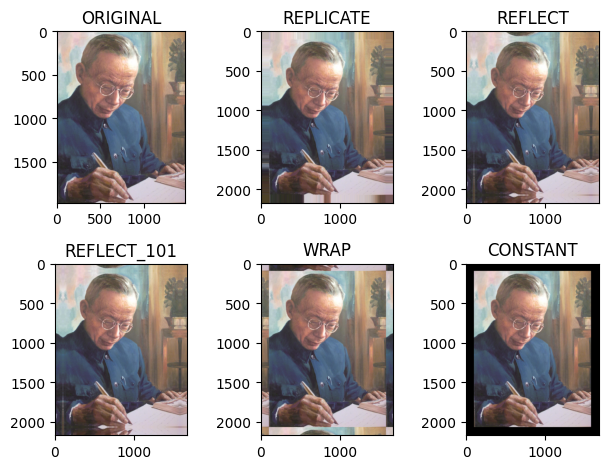

In [39]:
plt.subplot(231), plt.imshow(img_rgb,'gray'), plt.title('ORIGINAL')
plt.subplot(232), plt.imshow(replicate,'gray'), plt.title('REPLICATE')
plt.subplot(233), plt.imshow(reflect,'gray'), plt.title('REFLECT')
plt.subplot(234), plt.imshow(reflect101,'gray'), plt.title('REFLECT_101')
plt.subplot(235), plt.imshow(wrap,'gray'), plt.title('WRAP')
plt.subplot(236), plt.imshow(constant,'gray'), plt.title('CONSTANT')

plt.tight_layout()
plt.show()

### **6.数值计算**

In [ ]:
img_cat = cv2.imread(r'..\assets\img\cat.jpg')
img_dog = cv2.imread(r'..\assets\img\dog.jpg')

In [53]:
img_cat2 = img_cat + 10 #图像的每个像素的值都加10

print(img_cat[:5,:,0])
print(img_cat2[:5,:,0]) #查看前5行的B通道数据

[[231 231 231 ... 230 230 230]
 [231 231 231 ... 230 230 230]
 [231 231 231 ... 230 230 230]
 [231 231 231 ... 230 230 230]
 [231 231 231 ... 230 230 230]]
[[241 241 241 ... 240 240 240]
 [241 241 241 ... 240 240 240]
 [241 241 241 ... 240 240 240]
 [241 241 241 ... 240 240 240]
 [241 241 241 ... 240 240 240]]


In [57]:
(img_cat + img_cat2)[:5,:,0]  #两个图像相加，超过的部分为x%256，例如231+241-256=216
cv2.add(img_cat, img_cat2)[:5,:,0]  #add函数相加，超过255的部分会被截断为255

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

### **7.图像融合**

In [ ]:
#如果两张图像的大小不一致，直接相加会报错
#shape一样可以正常相加
# img_cat + img_dog

In [60]:
img_cat.shape

(554, 554, 3)

In [ ]:
#给dog的图像resize成和cat一样的大小
img_dog = cv2.resize(img_dog, (img_cat.shape[1], img_cat.shape[0])) #注意resize的参数是(w,h)
img_dog.shape

(800, 800, 3)

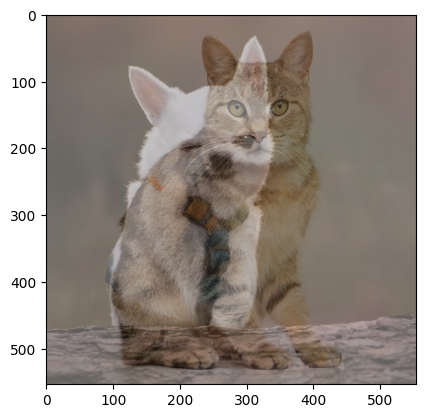

In [ ]:
res = cv2.addWeighted(img_cat, 0.4, img_dog, 0.4, 0) #图像融合，后面的0是加权和的偏移量，亮度
res_RGB = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)  #转换为RGB格式
plt.imshow(res_RGB)

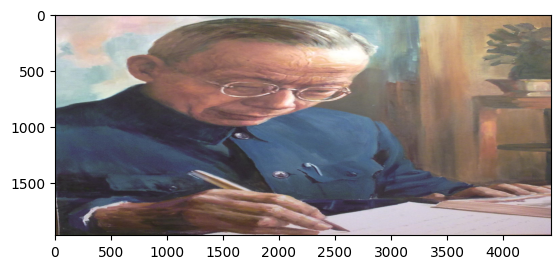

In [ ]:
res = cv2.resize(img,(0,0),fx=3,fy=1) #图像缩放，fx和fy分别是x和y方向的缩放比例
res_RGB = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)
plt.imshow(res_RGB)

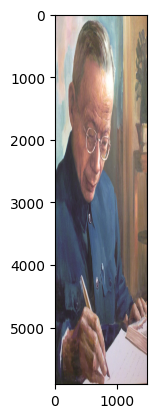

In [84]:
res = cv2.resize(img,(0,0),fx=1,fy=3)
res_RGB = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)
plt.imshow(res_RGB)

## ②阈值与平滑处理

### **1.图像阈值**

**ret, dst = cv2.threshold(src,thresh,maxval,type)**  

- src: 输入图，只能输入单通道图像，通常为灰度图  
- det: 输出图  
- thresh: 阈值  
- maxval: 当像素值超过或小于（根据type决定）阈值，所赋予的值  
- type: 二值化操作的类型，包含以下5种类型：  
1. cv2.THRESH_BINARY: 超过阈值取maxval，否则取0
2. cv2.THRESH_BINARY_INV: THRESH_BINARY的反转  
3. cv2.THRESH_TRUNC: 超过阈值部分设为阈值，否则不变  
4. cv2.THRESH_TOZERO: 超过阈值部分不变，否则设为0  
5. cv2.THRESH_TOZERO_INV: THRESH_TOZERO的反转   

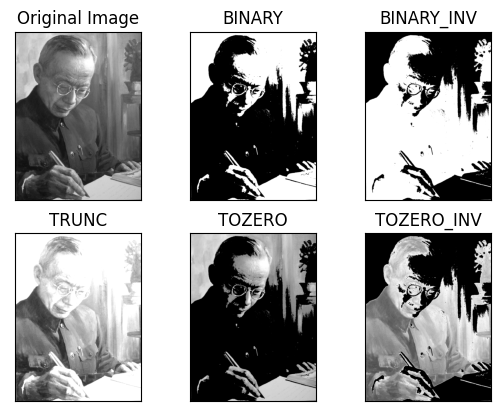

In [35]:
ret, thresh1 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY) #二值化处理
ret, thresh2 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV) #反二值化处理
ret, thresh3 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TRUNC) #截断处理
ret, thresh4 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TOZERO) #保留大于阈值的部分
ret, thresh5 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TOZERO_INV) #保留小于阈值的部分

titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img_gray, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2, 3, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
    
plt.show()

### **2.图像平滑处理**

<div>
  <img src="..\assets\img\input_image.png" width="20%" height="auto" />
</div>

In [37]:
img_noise = cv2.imread(r'..\assets\img\Noise.jpeg')

cv2.imshow('Noise', img_noise)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [48]:
#均值滤波
#简单平均卷积操作
blur_filter = cv2.blur(img_noise, (3, 3))  # 3x3的卷积核

cv2.imshow('Blurred Image', blur_filter)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [49]:
#方框滤波
#基本和均值滤波一样，但是可以选择归一化
box_filter = cv2.boxFilter(img_noise, -1, (3, 3), normalize=True)  # 3x3的卷积核

cv2.imshow('Box Filtered Image', box_filter)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#方框滤波
#False不归一化，容易越界，保持255值
box_filter = cv2.boxFilter(img_noise, -1, (3, 3), normalize=False)  # 3x3的卷积核

cv2.imshow('Box Filtered Image', box_filter)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#高斯滤波
#设置权重矩阵，加权滤波
gaussian_filter = cv2.GaussianBlur(img_noise, (3, 3), 0)  #0: 自动计算标准差

cv2.imshow('Gaussian Filtered Image', gaussian_filter)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [46]:
#中值滤波
#相当于对每个像素点取周围像素的中位数
median_filter = cv2.medianBlur(img_noise, 5)  #5x5的卷积核

cv2.imshow('Median Filtered Image', median_filter)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [53]:
#对比所有滤波结果
res = np.hstack((blur_filter, gaussian_filter, median_filter))

cv2.imshow('Comparison of Filters', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

## ③图像形态学操作

### **1.腐蚀操作**

In [56]:
img_origin = cv2.imread(r'..\assets\img\Dai.png')

cv2.imshow('Original Image', img_origin)
cv2.waitKey(0)
cv2.destroyAllWindows()

<div>
  <img src="..\assets\img\Dai.png" width="20%" height="auto" />
</div>

In [ ]:
kernel = np.ones((5, 5), np.uint8)  # 5x5的卷积核
#腐蚀操作
img_erosion = cv2.erode(img_origin, kernel, iterations=1)  # iterations: 腐蚀次数

cv2.imshow('Erosion Image', img_erosion)
cv2.waitKey(0)
cv2.destroyAllWindows()

<div>
  <img src="..\assets\img\Dai_erosion.png" width="20%" height="auto" />
</div>

### **2.膨胀操作**

In [ ]:
img_origin = cv2.imread(r'..\assets\img\Dai.png')

cv2.imshow('Original Image', img_origin)
cv2.waitKey(0)
cv2.destroyAllWindows()

<div>
  <img src="..\assets\img\Dai.png" width="20%" height="auto" />
</div>

In [ ]:
kernel = np.ones((5, 5), np.uint8)  # 5x5的卷积核
#膨胀操作
img_dilation = cv2.dilate(img_origin, kernel, iterations=1)  # iterations: 膨胀次数

cv2.imshow('Dilation Image', img_dilation)
cv2.waitKey(0)
cv2.destroyAllWindows()

<div>
  <img src="..\assets\img\Dai_dilation.png" width="20%" height="auto" />
</div>

### **3.开运算与闭运算**

- 开运算：先腐蚀，再膨胀
- 闭运算：先膨胀，再腐蚀

In [61]:
#开：先腐蚀，再膨胀
img = cv2.imread(r'..\assets\img\Dai.png')

kernel = np.ones((5, 5), np.uint8)  # 5x5的卷积核
img_opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)  # 开运算

cv2.imshow('Opening Image', img_opening)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [62]:
#闭：先膨胀，再腐蚀
img = cv2.imread(r'..\assets\img\Dai.png')

kernel = np.ones((5, 5), np.uint8)  # 5x5的卷积核
img_closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)  # 闭运算

cv2.imshow('Closing Image', img_closing)
cv2.waitKey(0)
cv2.destroyAllWindows()

### **4.梯度运算**

- 梯度=膨胀-腐蚀

In [63]:
img = cv2.imread(r'..\assets\img\Dai.png')
kernel = np.ones((5, 5), np.uint8)  # 5x5的卷积核

img_dilation = cv2.dilate(img, kernel, iterations=1)  # 膨胀操作
img_erosion = cv2.erode(img, kernel, iterations=1)  # 腐蚀操作
res = np.hstack((img_dilation, img_erosion))

cv2.imshow('Dilation and Erosion Comparison', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
img_gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)  # 梯度运算

cv2.imshow('Gradient Image', img_gradient)
cv2.waitKey(0)
cv2.destroyAllWindows()

<div>
  <img src="..\assets\img\Dai_gradient.png" width="20%" height="auto" />
</div>

### **5.礼帽和黑帽**

- 礼帽：原始输入-开运算
- 黑帽：闭运算-原始输入

In [66]:
#礼帽
img = cv2.imread(r'..\assets\img\Dai.png')
img_tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)  # 礼帽运算

cv2.imshow('Tophat Image', img_tophat)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [67]:
#黑帽
img = cv2.imread(r'..\assets\img\Dai.png')
img_blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)  # 黑帽运算

cv2.imshow('Blackhat Image', img_blackhat)
cv2.waitKey(0)
cv2.destroyAllWindows()